In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer, LSTM
from tensorflow.keras.optimizers import  Adam, SGD
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import export_graphviz
#Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import pickle

from sklearn.tree import DecisionTreeClassifier


In [22]:
df = pd.read_csv('train.csv')
df 

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [23]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [24]:
#Revisar valores nulos
df_nulls = df.isnull().sum()
df_nulls

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [25]:
# Eliminar filas con valores faltantes
df = df.dropna()
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [26]:
# Eliminar las columnas 'Artist Name' y 'Track Name'
df = df.drop(['Track Name','Artist Name'], axis=1)
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [27]:
#obtiene la frecuencia de cada genero y su media
frecuencia_genero = df['Class'].value_counts()

#imprime los resultados
print(frecuencia_genero)

Class
10    3374
6     2039
8     1523
9     1099
1     1037
2      956
5      517
7      464
0      386
3      270
4      148
Name: count, dtype: int64


In [28]:
conteo_generos = df['Class'].value_counts()

# Filtrar solo los géneros con 1000 o más entradas
generos_mayor_100 = conteo_generos[conteo_generos >= 100]

# Obtener el número mínimo de entradas entre los géneros seleccionados
min_entradas = generos_mayor_100.min()

# Filtrar el DataFrame original para incluir solo los géneros seleccionados
df_filtrado = df[df['Class'].isin(generos_mayor_100.index)]

# Ajustar la cantidad de entradas para que todos los géneros tengan la misma cantidad
df = df_filtrado.groupby('Class').apply(lambda x: x.sample(min_entradas)).reset_index(drop=True)

# Verificar el nuevo conteo de entradas por género
print(df['Class'].value_counts())

Class
0     148
1     148
2     148
3     148
4     148
5     148
6     148
7     148
8     148
9     148
10    148
Name: count, dtype: int64


In [29]:
# Estandarización de los datos
le = LabelEncoder()
valores_numericos = df.columns.drop(['key', 'mode', 'time_signature', 'Class'])

scaler = StandardScaler()

df[valores_numericos] = scaler.fit_transform(df[valores_numericos])

df.head()





,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0.893927,-0.755385,-2.060061,8.0,-1.399243,1,-0.282245,1.576475,-0.601088,-0.479642,-1.202922,-1.786342,-1.132384,3,0
1,-1.121503,0.819619,0.592363,2.0,0.899743,1,-0.237588,-0.187221,-0.446035,1.015780,1.521784,0.490640,-1.132396,4,0
2,0.663592,-0.045768,0.963252,7.0,0.595931,1,-0.434078,-0.979032,-0.601103,-0.105787,0.708672,-0.351534,-1.132394,4,0
3,-1.639756,-1.020771,-1.311785,1.0,-0.415964,1,-0.500425,1.559888,-0.600757,-0.517028,-0.937097,-1.133664,-1.132393,4,0
4,-1.351838,-1.557311,-0.577655,11.0,-0.267406,1,-0.224829,1.504600,-0.577522,-0.367486,-1.167740,1.763264,-1.132391,3,0


In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

encoded_columns = encoder.fit_transform(df[['key', 'mode', 'time_signature']])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['key', 'mode', 'time_signature']))

df = df.drop(['key', 'mode', 'time_signature'], axis=1)
df = pd.concat([df, encoded_df], axis=1)
encoded_df

,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1624,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1626,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Random Forest

In [31]:
# Separar target y features
X = df.drop(['Class'], axis=1)
y = df['Class']

In [32]:
X

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_8.0,key_9.0,key_10.0,key_11.0,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.893927,-0.755385,-2.060061,-1.399243,-0.282245,1.576475,-0.601088,-0.479642,-1.202922,-1.786342,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.121503,0.819619,0.592363,0.899743,-0.237588,-0.187221,-0.446035,1.015780,1.521784,0.490640,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.663592,-0.045768,0.963252,0.595931,-0.434078,-0.979032,-0.601103,-0.105787,0.708672,-0.351534,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.639756,-1.020771,-1.311785,-0.415964,-0.500425,1.559888,-0.600757,-0.517028,-0.937097,-1.133664,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.351838,-1.557311,-0.577655,-0.267406,-0.224829,1.504600,-0.577522,-0.367486,-1.167740,1.763264,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1.642515,-1.465003,-0.352063,-0.994363,-0.486390,-0.629528,-0.600982,-0.510797,-0.143531,-0.715372,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1624,1.181846,-0.622693,-0.677069,-0.075824,-0.486390,-0.976489,2.240098,-0.517028,-1.136466,0.794602,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1625,-0.372915,0.790773,-1.109134,-1.911482,-0.152103,1.153519,-0.601113,-0.580584,0.618761,-0.019150,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1626,-0.142580,-0.968848,0.871486,0.756057,-0.221002,-0.972315,-0.598787,-0.411102,0.564032,1.069198,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [33]:
random_state = 55

In [34]:
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)


In [35]:
type(X_train)

pandas.core.frame.DataFrame

In [36]:
rf_model = RandomForestClassifier(n_estimators=512, random_state=random_state)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=512, random_state=55)

In [37]:
#score
rf_model.score(X_test, y_test)

0.5705521472392638

In [38]:
#GUARDA EL MODELO RANDOM FOREST
pickle.dump(rf_model, open('modelos/RandomForestClassifier.sav', 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'modelos/RandomForestClassifier.sav'

In [ ]:
dtc_model = DecisionTreeClassifier(random_state=random_state)
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=55)

In [ ]:
dtc_model.score(X_test, y_test)

0.44785276073619634

In [ ]:
pickle.dump(dtc_model, open('modelos/DecisionTreeClassifier.sav', 'wb'))


In [ ]:
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)
y_train_t = to_categorical(y_train)
y_test_t = to_categorical(y_test)

In [ ]:
type(X_train_t)

In [22]:
num_epochs = 500
learning_rate = 5e-3

In [25]:
model_block = Sequential()
model_block.add(InputLayer(input_shape=(X_train_t.shape[1],)))
model_block.add(Dense(512, activation='relu'))
model_block.add(Dropout(0.5))
model_block.add(Dense(128, activation='relu'))
model_block.add(Dropout(0.5))
model_block.add(Dense(64, activation='relu'))
model_block.add(Dropout(0.5))

model_block.add(Dense(y_train_t.shape[1], activation='softmax'))
model_block.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
model_block.summary()
model_fit = model_block.fit(X_train_t, y_train_t, epochs=num_epochs, validation_data=(X_test_t, y_test_t), batch_size=32)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               14848     
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 11)               

In [24]:
#guarda el modelo
model_block.save('modelos/NN_1.h5')

#guarda el fit
pickle.dump(model_fit, open('modelos/NN_1_fit.sav', 'wb'))

c:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
model_lstm = Sequential()
model_lstm.add(LSTM(256, input_shape=(X_train_t.shape[1],1)))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(y_train_t.shape[1], activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=learning_rate, momentum=0.8),metrics=['accuracy'])
model_lstm.summary()
model_lstm_fit = model_lstm.fit(X_train_t, y_train_t, epochs=num_epochs, validation_data=(X_test_t, y_test_t), batch_size=32)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 11)               

In [26]:
#guarda el modelo
model_lstm.save('modelos/NN_LSTM.h5')

#guarda el fit
pickle.dump(model_lstm_fit, open('modelos/NN_LSTM_fit.sav', 'wb'))

In [26]:
sub = pd.read_csv('submission.csv')
genero_labels = {}
for columna in sub.columns:
    split = columna.rsplit('_', 1)
    genero_labels[int(split[1])] = split[0]
genero_labels

{0: 'Acoustic/Folk',
 1: 'Alt_Music',
 2: 'Blues',
 3: 'Bollywood',
 4: 'Country',
 5: 'HipHop',
 6: 'Indie Alt',
 7: 'Instrumental',
 8: 'Metal',
 9: 'Pop',
 10: 'Rock'}

In [27]:
def cm(y_test, modelo):
    y_test_labeled = y_test.map(genero_labels)
    y_pred = modelo.predict(X_test)
    y_pred_labeled = pd.Series(y_pred).map(genero_labels)
    cm = confusion_matrix(y_test_labeled, y_pred_labeled)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genero_labels.values())
    disp.plot()
    plt.title(modelo)
    plt.xticks(rotation=90)
    plt.show()

def cm_bloques(y_test_t, model):
    predictions = model.predict(X_test_t)
    predictions = np.argmax(predictions, axis=1)
    real_y = np.argmax(y_test_t, axis=1)
    cm = confusion_matrix(real_y, predictions,)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genero_labels.values())
    disp.plot()
    plt.title(f'Modelo {model.name}')
    plt.xticks(rotation=90)
    plt.show()

def graficos(model_fit):
    #grafico perdida vs epoch 
    plt.figure()
    plt.plot(model_fit.epoch, model_fit.history['loss'])
    plt.plot(model_fit.epoch, model_fit.history['val_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Entrenamiento")
    plt.legend(['loss', 'val_loss'])
    plt.show()

    #Grafico accuracy vs val_accuracy
    plt.figure()
    plt.plot(model_fit.epoch, model_fit.history['accuracy'])
    plt.plot(model_fit.epoch, model_fit.history['val_accuracy'])
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.title("Entrenamiento")
    plt.legend(['accuracy', 'val_accuracy'])
    plt.show()

def mostrar_metricas(y_pred):
    y_test_labeled = y_test.map(genero_labels)
    y_pred_labeled = pd.Series(y_pred).map(genero_labels)

    classification_metrics_labeled = classification_report(y_test_labeled, y_pred_labeled, output_dict=True)
    classification_metrics_labeled_df = pd.DataFrame(classification_metrics_labeled).transpose()
    return classification_metrics_labeled_df


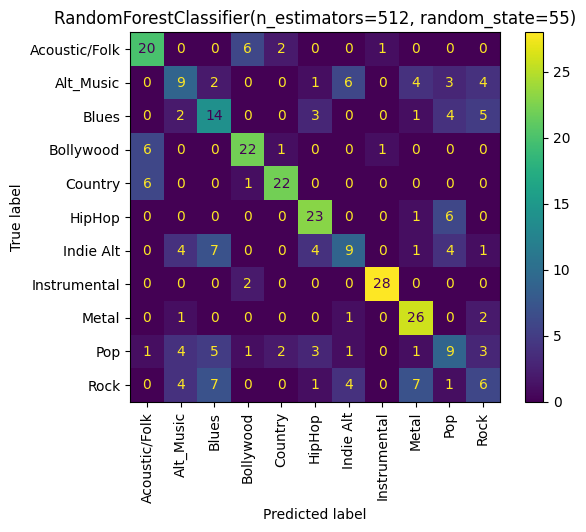

,precision,recall,f1-score,support
Acoustic/Folk,0.606061,0.689655,0.645161,29.000000
Alt_Music,0.375000,0.310345,0.339623,29.000000
Blues,0.400000,0.482759,0.437500,29.000000
Bollywood,0.687500,0.733333,0.709677,30.000000
Country,0.814815,0.758621,0.785714,29.000000
HipHop,0.657143,0.766667,0.707692,30.000000
Indie Alt,0.428571,0.300000,0.352941,30.000000
Instrumental,0.933333,0.933333,0.933333,30.000000
Metal,0.634146,0.866667,0.732394,30.000000
Pop,0.333333,0.300000,0.315789,30.000000


In [28]:
#carga el modelo random forest
rf_model = pickle.load(open('modelos/RandomForestClassifier.sav', 'rb'))
y_pred_rf = rf_model.predict(X_test)
cm(y_test,y_pred_rf, rf_model)
mostrar_metricas(y_pred_rf)


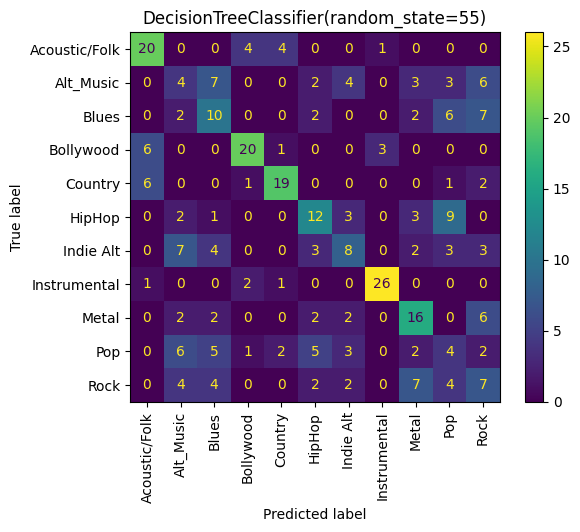

,precision,recall,f1-score,support
Acoustic/Folk,0.606061,0.689655,0.645161,29.000000
Alt_Music,0.148148,0.137931,0.142857,29.000000
Blues,0.303030,0.344828,0.322581,29.000000
Bollywood,0.714286,0.666667,0.689655,30.000000
Country,0.703704,0.655172,0.678571,29.000000
HipHop,0.428571,0.400000,0.413793,30.000000
Indie Alt,0.363636,0.266667,0.307692,30.000000
Instrumental,0.866667,0.866667,0.866667,30.000000
Metal,0.457143,0.533333,0.492308,30.000000
Pop,0.133333,0.133333,0.133333,30.000000


In [29]:
#carga el modelo decision tree
dtc_model = pickle.load(open('modelos/DecisionTreeClassifier.sav', 'rb'))
y_pred_dtc = dtc_model.predict(X_test)
cm(y_test,y_pred_dtc, dtc_model)
mostrar_metricas(y_pred_dtc)


11/11 [==============================] - 0s 1ms/step


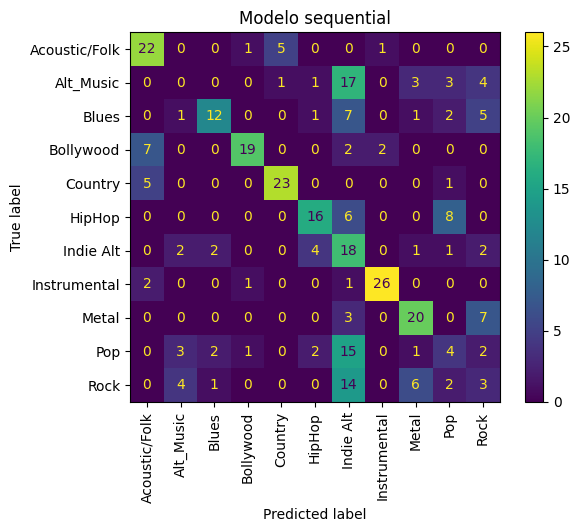

In [30]:
#carga el primer modelo
model_block = tf.keras.models.load_model('modelos/NN_1.h5')
cm_bloques(y_test_t, model_block)

11/11 [==============================] - 1s 29ms/step


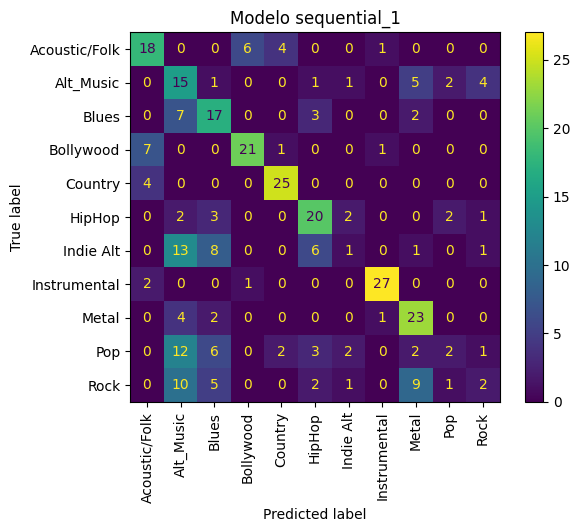

In [31]:
#carga el modelo NN_1
model_lstm = tf.keras.models.load_model('modelos/NN_LSTM.h5')
cm_bloques(y_test_t, model_lstm)

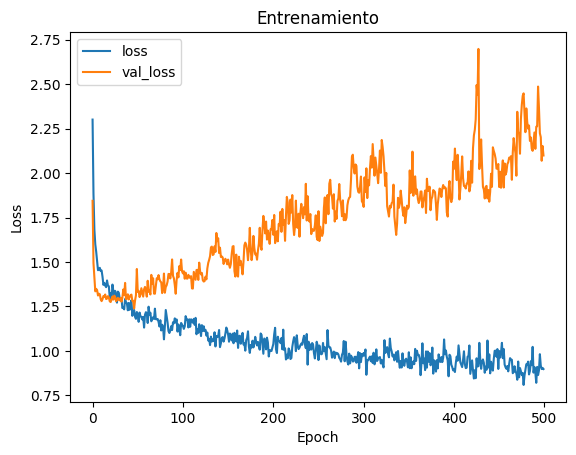

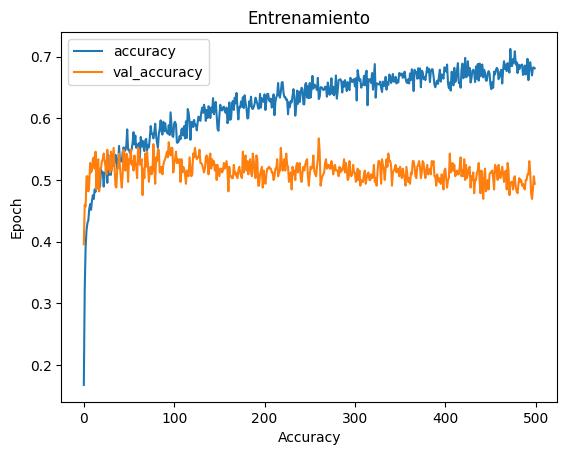

In [32]:
graficos(model_fit)

In [33]:
graficos(model_lstm_fit)

NameError: name 'model_lstm_fit' is not defined